In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # 분류분석
from sklearn.tree import DecisionTreeClassifier # 의사결정 트리
from sklearn.neural_network import MLPClassifier # 신경망
from sklearn.ensemble import RandomForestClassifier # 앙상블

In [44]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [45]:
X = iris.iloc[:, :-1] #독립변수
y = iris.iloc[:, -1] # 종속변수

In [46]:
model = QuadraticDiscriminantAnalysis()
model.fit(X, y) # train 톡립변수, train 종속변수

QuadraticDiscriminantAnalysis()

In [47]:
import pandas as pd
pred = model.predict(X) # .predict()는 label을 알려줌
pd.crosstab(y, pred)

col_0,setosa,versicolor,virginica
species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,1,49


In [48]:
import numpy as np
np.argmax(model.predict_proba(X), axis=1) # 가장 큰 값을 가지는 '열'인덱스 반환

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [49]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2,
                           random_state=9)

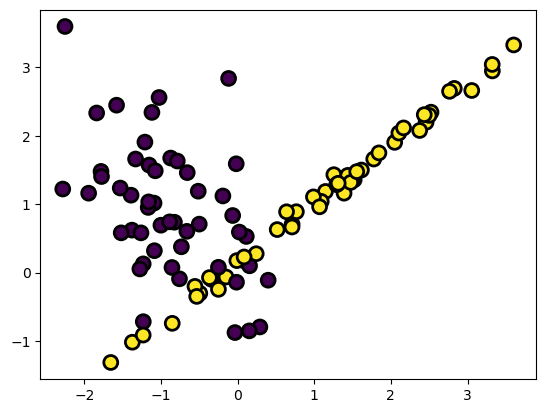

In [50]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', c=y,
            s=100, edgecolor='k', linewidth=2)
plt.show()

In [51]:
X.shape, y.shape

((100, 2), (100,))

In [52]:
print(y)

[0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]


In [53]:
X[y==1, :] = -X[y==0, :]

In [54]:
X

array([[-0.73358502,  0.37658657],
       [ 0.73358502, -0.37658657],
       [ 2.25158719, -3.59851363],
       [-2.25158719,  3.59851363],
       [ 0.6615633 , -0.60245197],
       [-0.29056799,  0.79574845],
       [ 0.75840198,  0.09163451],
       [ 1.0857811 , -0.31935934],
       [-0.6615633 ,  0.60245197],
       [ 0.29056799, -0.79574845],
       [-0.15243647,  0.85289384],
       [-0.75840198, -0.09163451],
       [ 1.57913264, -2.44747554],
       [ 1.09008514, -1.01576934],
       [ 0.19187251, -1.12016949],
       [-1.0857811 ,  0.31935934],
       [ 1.38995428, -1.13133735],
       [ 1.16641917, -0.95230581],
       [-0.39860503,  0.11207611],
       [ 0.87330412, -1.67422524],
       [ 0.65714568, -1.46123522],
       [ 0.15243647, -0.85289384],
       [-1.57913264,  2.44747554],
       [-1.09008514,  1.01576934],
       [ 0.82423053, -0.7359648 ],
       [ 1.83884675, -2.33347442],
       [ 1.15494571, -1.57224302],
       [-0.19187251,  1.12016949],
       [-1.38995428,

In [55]:
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

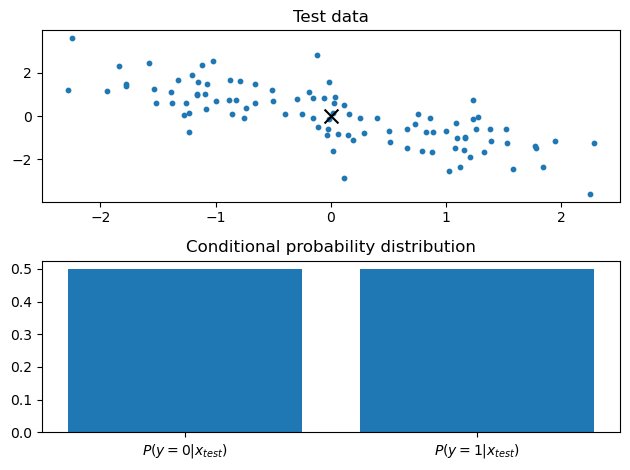

In [57]:
x = [[0,0]]
p = model.predict_proba(x)[0]
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution") # 조건부 확률 분포
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()

In [58]:
p = model.predict_proba(X)
p.shape

(100, 2)

In [59]:
p[0]

array([0.93883464, 0.06116536])

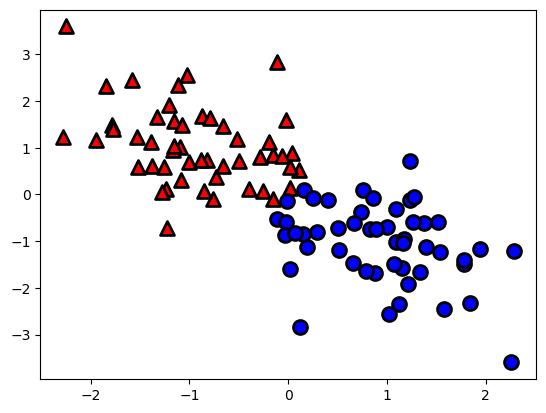

In [60]:
h = model.predict(X)
plt.scatter(X[h==0, 0], X[h==0, 1], marker='^', c="r",
            s=100, edgecolors="k", linewidth=2)
plt.scatter(X[h==1, 0], X[h==1, 1], marker='o', c="b",
            s=100, edgecolor="k", linewidth=2)
plt.show()

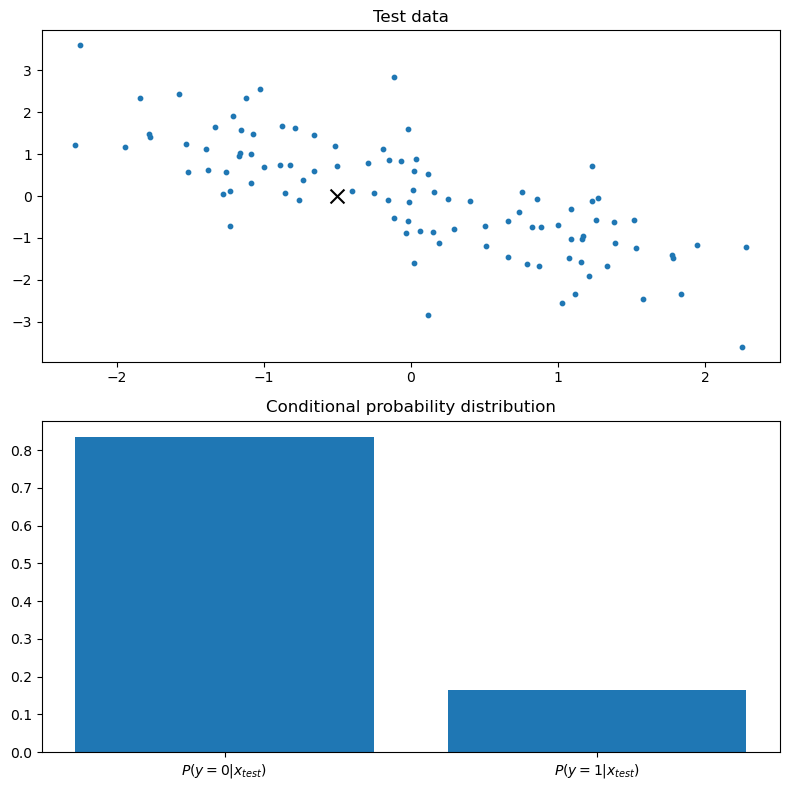

In [62]:
x = [[-0.5,0]]
p = model.predict_proba(x)[0]
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

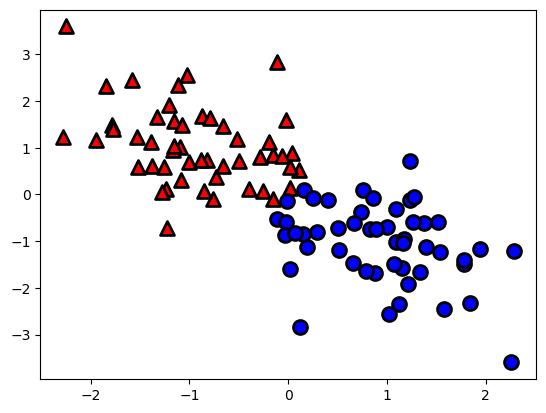

In [63]:
h = model.predict(X)
plt.scatter(X[h==0, 0], X[h==0, 1], marker='^', c="r",
            s=100, edgecolors="k", linewidth=2)
plt.scatter(X[h==1, 0], X[h==1, 1], marker='o', c="b",
            s=100, edgecolor="k", linewidth=2)
plt.show()

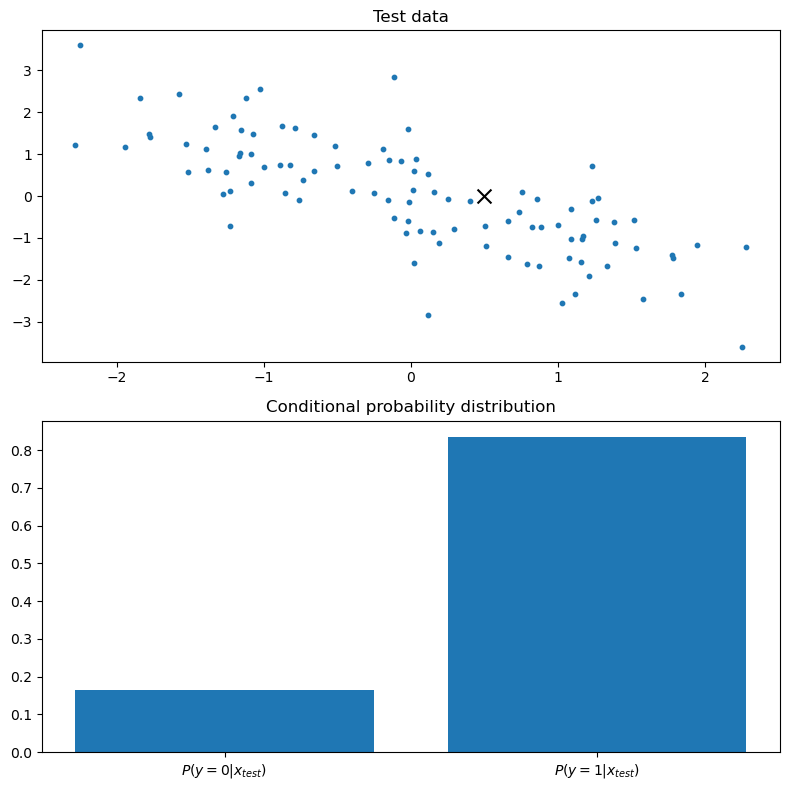

In [64]:
x = [[0.5,0]]
p = model.predict_proba(x)[0]
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

In [65]:
import numpy as np

In [66]:
model.decision_function(X)

array([ -2.73105827,   2.73105827,  10.63517679, -10.63517679,
         2.70533314,  -1.67807104,   2.37987963,   3.82272404,
        -2.70533314,   1.67807104,  -1.28192214,  -2.37987963,
         7.3885157 ,   4.47897874,   1.65656445,  -3.82272404,
         5.5599723 ,   4.66849277,  -1.39861055,   4.38182496,
         3.48299713,   1.28192214,  -7.3885157 ,  -4.47897874,
         3.35704551,   8.1273057 ,   5.20295172,  -1.65656445,
        -5.5599723 ,  -4.66849277,   5.79202427,   0.11824366,
         1.39861055,   7.15441235,  -4.38182496,  -3.48299713,
         5.0520105 ,  -3.35704551,  -8.1273057 ,   4.11929614,
        -5.20295172,  -5.79202427,  -0.11824366,  -7.15441235,
        -5.0520105 ,  -4.11929614,  -8.53812301,  -0.47135375,
        -4.19164125,   8.53812301,   0.47135375,   4.19164125,
        -3.33618684,   3.33618684,  -7.38524426,   7.38524426,
        -4.72386961,   0.41622444,   4.72386961,  -0.41622444,
        -5.68876105,   5.68876105,   4.86299348,  -4.86

In [68]:
model.decision_function(X)

array([ -2.73105827,   2.73105827,  10.63517679, -10.63517679,
         2.70533314,  -1.67807104,   2.37987963,   3.82272404,
        -2.70533314,   1.67807104,  -1.28192214,  -2.37987963,
         7.3885157 ,   4.47897874,   1.65656445,  -3.82272404,
         5.5599723 ,   4.66849277,  -1.39861055,   4.38182496,
         3.48299713,   1.28192214,  -7.3885157 ,  -4.47897874,
         3.35704551,   8.1273057 ,   5.20295172,  -1.65656445,
        -5.5599723 ,  -4.66849277,   5.79202427,   0.11824366,
         1.39861055,   7.15441235,  -4.38182496,  -3.48299713,
         5.0520105 ,  -3.35704551,  -8.1273057 ,   4.11929614,
        -5.20295172,  -5.79202427,  -0.11824366,  -7.15441235,
        -5.0520105 ,  -4.11929614,  -8.53812301,  -0.47135375,
        -4.19164125,   8.53812301,   0.47135375,   4.19164125,
        -3.33618684,   3.33618684,  -7.38524426,   7.38524426,
        -4.72386961,   0.41622444,   4.72386961,  -0.41622444,
        -5.68876105,   5.68876105,   4.86299348,  -4.86

In [70]:
print(y[:4])

[0 1 1 0]


In [71]:
from sklearn.datasets import load_iris
data = load_iris()

In [72]:
X = data.data[:,2:]
y = data.target
feature_names = data.feature_names[2:]

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
iris = sns.load_dataset('iris')
X = iris.iloc[:,:-1]
y = iris.species

In [75]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [76]:
test_X = [[5.0, 3.4, 1.2, 0.25]]
model.predict(test_X)

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array(['setosa'], dtype='<U10')

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


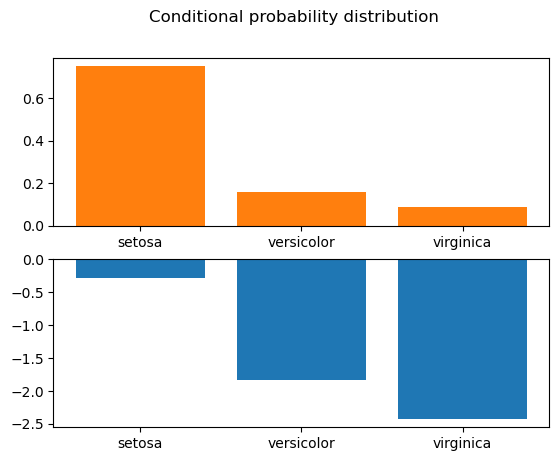

In [78]:
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt. bar(model.classes_, model.predict_proba(test_X)[0])
plt.xticks(model.classes_)
plt.subplot(212)
plt. bar(model.classes_, model.predict_log_proba(test_X)[0])
plt.xticks(model.classes_)
plt.suptitle("Conditional probability distribution")
plt.show()

In [79]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1, n_redundant=0,
                           n_informative=1, n_clusters_per_class=1,
                           random_state=1)

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)

In [81]:
import numpy as np
xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:,1]

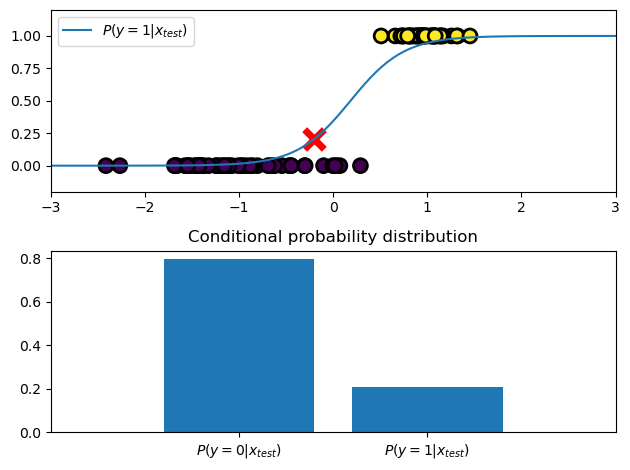

In [82]:
test_X = [[-0.2]]
plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X, y, marker='o', c=y, s=100, edgecolor='k', linewidths=2)
plt.scatter(test_X[0], model.predict_proba(test_X)[0][1:], marker='x', s=200, c='r', lw=5)
plt.xlim(-3,3)
plt.ylim(-.2,1.2)
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.xlim(-1,2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.title("Conditional probability distribution")
plt.tight_layout()
plt.show()

In [83]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
feature_names = iris.feature_names[2:]

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=1, random_state=0)
dt_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [85]:
import io
from sklearn.tree import export_graphviz

In [86]:
! pip install pydot

In [87]:
import pydot
from IPython.core.display import Image

In [88]:
def draw_decision_tree(model, feature_names=feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

In [89]:
import matplotlib as mpl

In [90]:
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    pred = model.predict(
            np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, pred, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, pred, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return pred

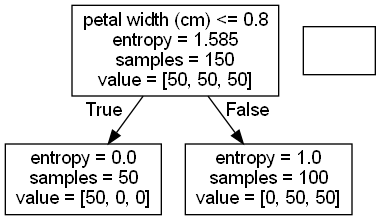

In [91]:
draw_decision_tree(dt_model, feature_names=iris.feature_names[2:])

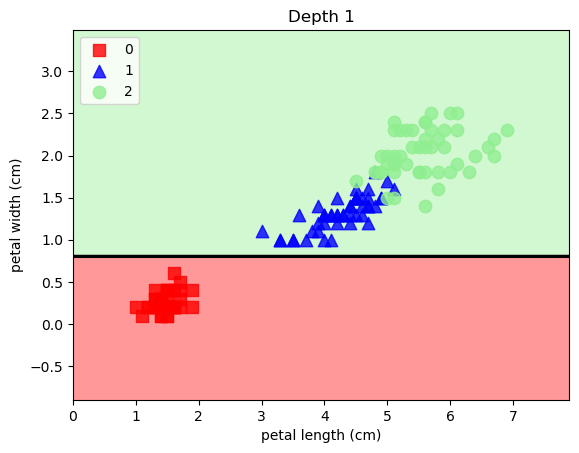

In [92]:
plot_decision_regions(X, y, dt_model, "Depth 1")
plt.show()

In [93]:
dt_model5 = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=5, random_state=0)
dt_model5.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

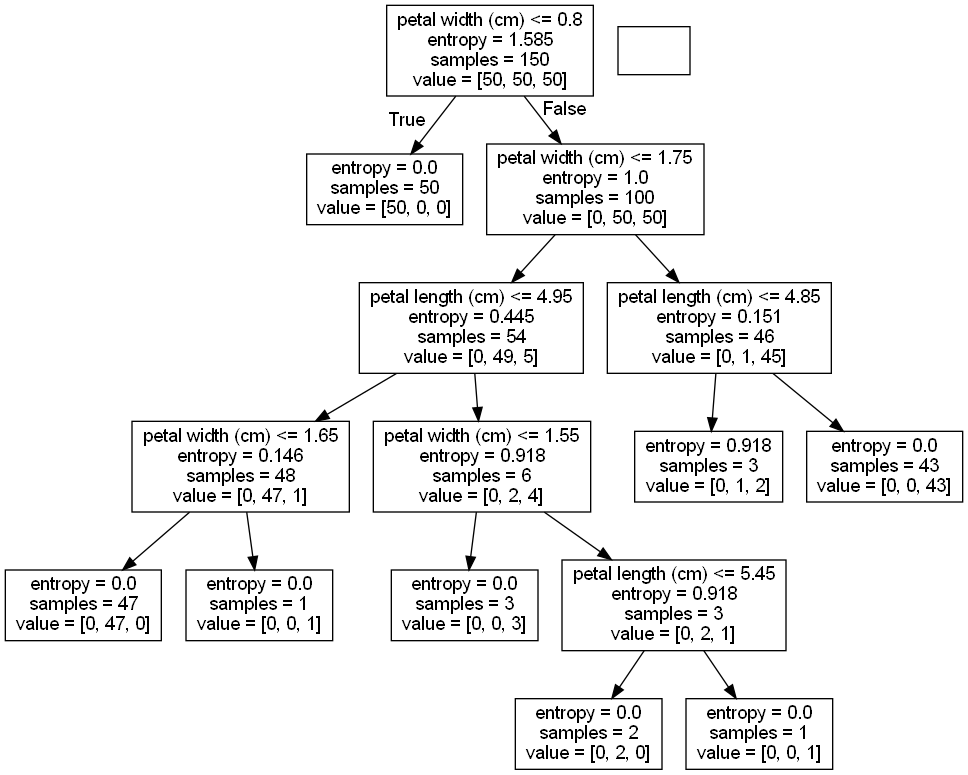

In [94]:
draw_decision_tree(dt_model5, feature_names=iris.feature_names[2:])

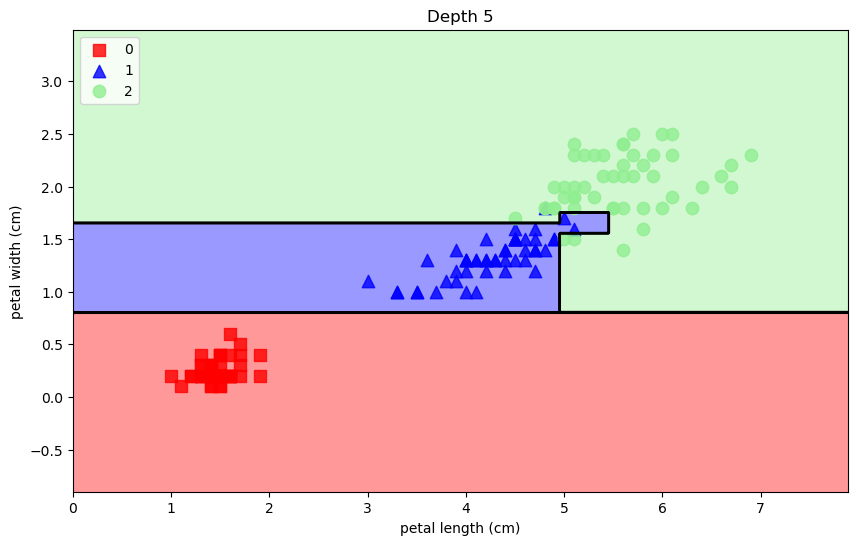

In [95]:
plt.figure(figsize=(10,6))
plot_decision_regions(X, y, dt_model5, "Depth 5")
plt.show()

In [96]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
dt_model6 = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=6, random_state=0).fit(X, y)

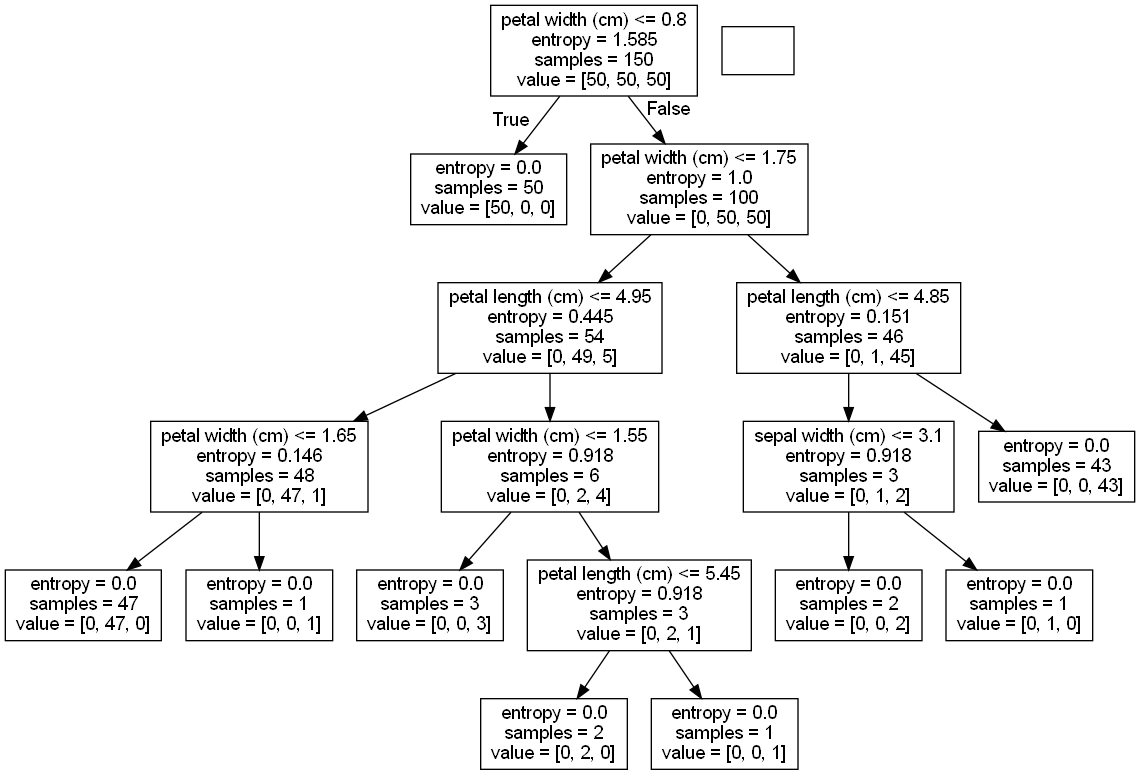

In [97]:
draw_decision_tree(dt_model6, feature_names=iris.feature_names)